# CompTaG Seminar Spring 2022 Reflection

### Eli Quist, May 2022

## Review of Some Dimensionality Reduction and Manifold Learning Techniques

### Overview

Throughout this semester, we focused on problems from the field of dimensionality reduction and, in particular, discussed several different Manifold Learning techniques. As a reflection, and to continue improving my skills in programming, I hope to implement and play around with some of the techniques we discussed.

### Principal Component Analysis

The first technique covered this semester was that of Principal Component Analysis (PCA). PCA is a very common technique for the dimensionality reduction of linear data. The general process of PCA is as follows.

1. Consider a dataset $\text{X}^{m \times n}$, with $m$ data points and dimension $n$. We wish to reduce the dimensionality from $n$ to $k \leq n$.
1. Calculate the covariance matrix $\text{S}^{m \times n}$: $$S = \frac{1}{n}\sum_{i=1}^{n} (x_i - \bar{x})(x_i - \bar{x})^{\text{T}}$$
1. We compute the Singular Value Decomposition (SVD) of the covariance matrix: $$\text{S} = \text{U}\Sigma\text{V}^{\text{T}}$$ where $\text{U}$ is of dimension $n \times n$, $\Sigma$ is of dimension $n \times m$, and $\text{V}$ is of dimesion $m \times m$. Importantly, we note that $\text{V} = [u_1, u_2, u_3, ..., u_m]$. For $i \in [1, m]$, we call each of these $u_i$ vectors a "principal component direction"
1. We project into a new matrix, $\text{Y}^{m \times k}$ using the $u_i$ above: $$\text{Y} = \text{P}^{\text{T}}\text{X}$$

This Y vector is our data with reduced dimensionality.

As discussed in seminar, these techniques are incredibly common in fields ranging from engineering to computer science, and are the backbone of solutions to problems in image processing and compression, recommendation algorithms, etc.

We now will see an implemented example of this.

First, we load some noisy, linear data in $\text{R}^3$.

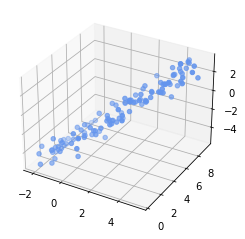

In [7]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = np.loadtxt("data/pcaLinearData.txt")

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color="cornflowerblue")

We will then use PCA to project this data onto it's two first principal components, and plot this in $\text{R}^2$.

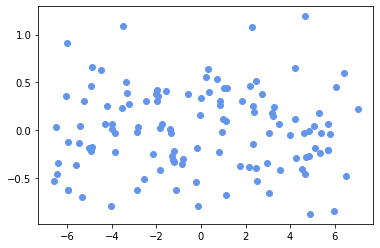

In [9]:
pca = PCA(n_components=3)
Y = pca.fit_transform(X)

_, ax = plt.subplots()
ax.scatter(Y[:,0], Y[:,1], color="cornflowerblue")

In order to see the impact of PCA, we can then plot the projected data in $\text{R}^3$, and see the resulting plane. It seems PCA has maintained the overall structure of the data quite well, but takes away noise.

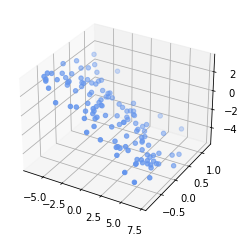

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(Y[:, 0], Y[:, 1], X[:, 2], color="cornflowerblue")

However, as explained this semester, PCA does not perform well for data that is nonlinear. Consider the following example, a swiss roll in $\text{R}^{3}$.

This swiss roll is nonlinear, and has been colored with colors ranging from purple to red to demonstrate the structure of the underlying manifold. Structurally, it is important to note that while some sections (for example, an orange point and a purple point) are relatively close in Euclidean space, the geodesic distance is quite far. 

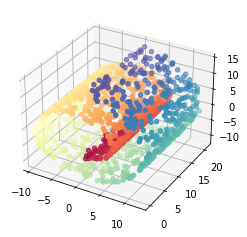

In [13]:
from sklearn import manifold, datasets
import matplotlib.pyplot as plt

# X = np.loadtxt("data/swissroll2.txt")
X, color = datasets.make_swiss_roll(n_samples=1500)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

As the main features of the data are not linear, the principal components fail to capture the primary structure of the data. A projection into $\text{R}^2$ reveals this.

Here, we see properties from Euclidean space being preserved. For example, the purple and orange points appear in almost the same section of the projection; before, we indicated these points are relatively close by a Euclidean metric, but their geodesic distance should be far.

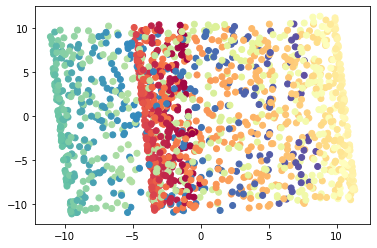

In [18]:
pca = PCA(n_components=3)
Y = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Y[:, 1], Y[:, 2], c=color, cmap=plt.cm.Spectral)

This idea is what drives much of the motivation for Manifold Learning. How might we reduce the dimensionality of this swiss roll based off of the nonlinear structure of the data (the underlying manifold)? Once we have learned the manifold, are we able to acheive a projection into a lower dimensional space where geodesic distances are clearly demonstrated?

### Isomap

Manifold learning starts with the assumption that our observed data lies on some low dimensional manifold [Melas-Kyriazi]. In our example, we assume the curve or roll is the lower dimensional manifold embedded in $\text{R}^3$. We can use this hypothesis along with a Manifold Learning technique to "unroll" our swiss roll.

As discussed in seminar this semester, one such technique is Isomap. Isomap was introduced in 2000, and was one of the first approaches to this problem. The Isomap algorithm consists of three main steps:

For points $p, q$, and a distance $d(p,q)$ (could be Euclidean metric, or some other),

1. __Find neighbors and construct a neighbor graph:__ We say $q$ is a neighbor of $p$ if, for some specified $\epsilon$, $d(p,q) < \epsilon$. Note that in another modification, we say $q$ is a neighbor of $p$ if it is one of the $K$ nearest neighbors of $p$. In either case, we construct a graph $G$ with edges between neighbors $p$ and $q$, where the length of the edge is $d(p,q)$.

1. __Compute Shortest Paths:__ Create a matrix of shortest path values $D_G$ between all pairs of points in our graph $G$ (typically, Dijkstra's algorithm is used here).

1. __Construct d-Dimensional Embedding:__ We compute the eigenvalues of $D_G$, and create a partial eigenvalue decomposition that encodes the embedding. 

[Tenenbaum et al.]

Using the same swiss roll as above, we can see the result: a lower dimensional embedding maintaining geodesic distances. Note that ScikitLearn's implementation uses the $K$ nearest neighbors approach for constructing the neighbor graph.

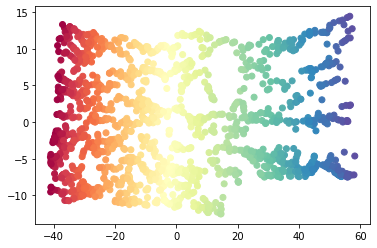

In [55]:
from sklearn.manifold import Isomap

embedding = Isomap(n_neighbors = 5, n_components=2)
X_transformed = embedding.fit_transform(X[:,0:3])

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=color, cmap=plt.cm.Spectral)

Here, we have a projection of the learned manifold into $\text{R}^2$. However, unlike our projection from PCA, we see the notion of geodesic distances is preserved in the space. The orange and purple points, which are far away from each other on the manifold, are indeed far away in the projection. 

Although these are only two techniques from the plethora we discussed this semester, the overarching principle remains the same. Implementing these algorithms to see them in action (and in Euclidean space) certainly helped me create a robust and comprehensive understanding of how these techniques work, and in which scenarios they work. Futhermore, I am forever thankful for the CompTaG group, and amazed that I can be exposed to such interesting discussions and concepts as an undergraduate. Thank you!

### References

[1] Jang, S. (2014). Basics and Examples of Principal Component Analysis (PCA). Rhea. https://www.projectrhea.org/rhea/index.php/PCA_Theory_Examples 

[2] Kaushik, S. (2019, April 4). Using a linear model to deal with a Nonlinear Dataset. Medium. https://medium.com/@sachinkun21/using-a-linear-model-to-deal-with-nonlinear-dataset-c6ed0f7f3f51 

[3] Melas-Kyriazi, L. (2020, October 30). The Mathematical Foundations of Manifold Learning. arXiv.org. https://arxiv.org/abs/2011.01307 

[4] Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011

[5] Tenenbaum, J. B., Silva, V. de, &amp; Langford, J. C. (2000). A global geometric framework for nonlinear dimensionality reduction. Science, 290(5500), 2319–2323. https://doi.org/10.1126/science.290.5500.2319 